In [2]:
import pandas as pd
import networkx as nx

from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)
from ../model_scripts/problem_formulation import get_model_for_problem_formulation


SyntaxError: invalid syntax (558932685.py, line 9)

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose disaggregation over dike rings
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [3]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:22<00:00,  8.93it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [4]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,21,98.240285,1.0,0.334782,181.517943,1.5,0.159520,297.838136,1.0,0.794298,...,3,2,7,6,2,2,1,4,0,dikesnet
1,61,34.200056,1.5,0.600062,164.927716,1.5,0.008677,112.223164,10.0,0.530881,...,3,2,7,6,2,2,1,5,0,dikesnet
2,76,190.727859,1.5,0.580160,134.805275,1.0,0.280614,276.259333,1.5,0.973480,...,3,2,7,6,2,2,1,6,0,dikesnet
3,126,260.510666,1.0,0.110806,63.268920,1.0,0.697794,326.247261,1.5,0.957204,...,3,2,7,6,2,2,1,7,0,dikesnet
4,47,85.346368,1.5,0.400355,207.783671,1.0,0.562387,182.426881,10.0,0.200953,...,3,2,7,6,2,2,1,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,66,179.324732,1.5,0.467398,149.913684,1.5,0.835549,213.404864,1.5,0.611029,...,0,6,10,2,9,5,4,49,3,dikesnet
196,4,250.760844,1.0,0.846770,325.104718,10.0,0.763400,81.346463,1.0,0.269510,...,0,6,10,2,9,5,4,50,3,dikesnet
197,106,106.443833,1.0,0.686168,191.008270,1.5,0.957306,76.058578,1.0,0.325608,...,0,6,10,2,9,5,4,51,3,dikesnet
198,118,160.953041,1.5,0.222625,58.106520,10.0,0.920179,193.009902,10.0,0.916688,...,0,6,10,2,9,5,4,52,3,dikesnet


In [10]:
PRIM_df = experiments.copy()

In [22]:
PRIM_df["A5_exp_deaths"] = outcomes["A.5_Expected Number of Deaths"]
threshold = PRIM_df["A5_exp_deaths"].quantile(0.9)
PRIM_df["top_10"] = PRIM_df["A5_exp_deaths"] >= threshold

In [14]:
from ema_workbench.analysis import prim
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
p = prim.Prim(experiments, PRIM_df["top_10"], 0.3)

[MainProcess/INFO] column model dropped from analysis because it has only one category


In [34]:
box = p.find_box()

[MainProcess/INFO] 200 points remaining, containing 20 cases of interest
C:\Users\adell\Main\MBDM\Git_directory\.venv\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] mean: 1.0, mass: 0.07, coverage: 0.7, density: 1.0 restricted_dimensions: 10


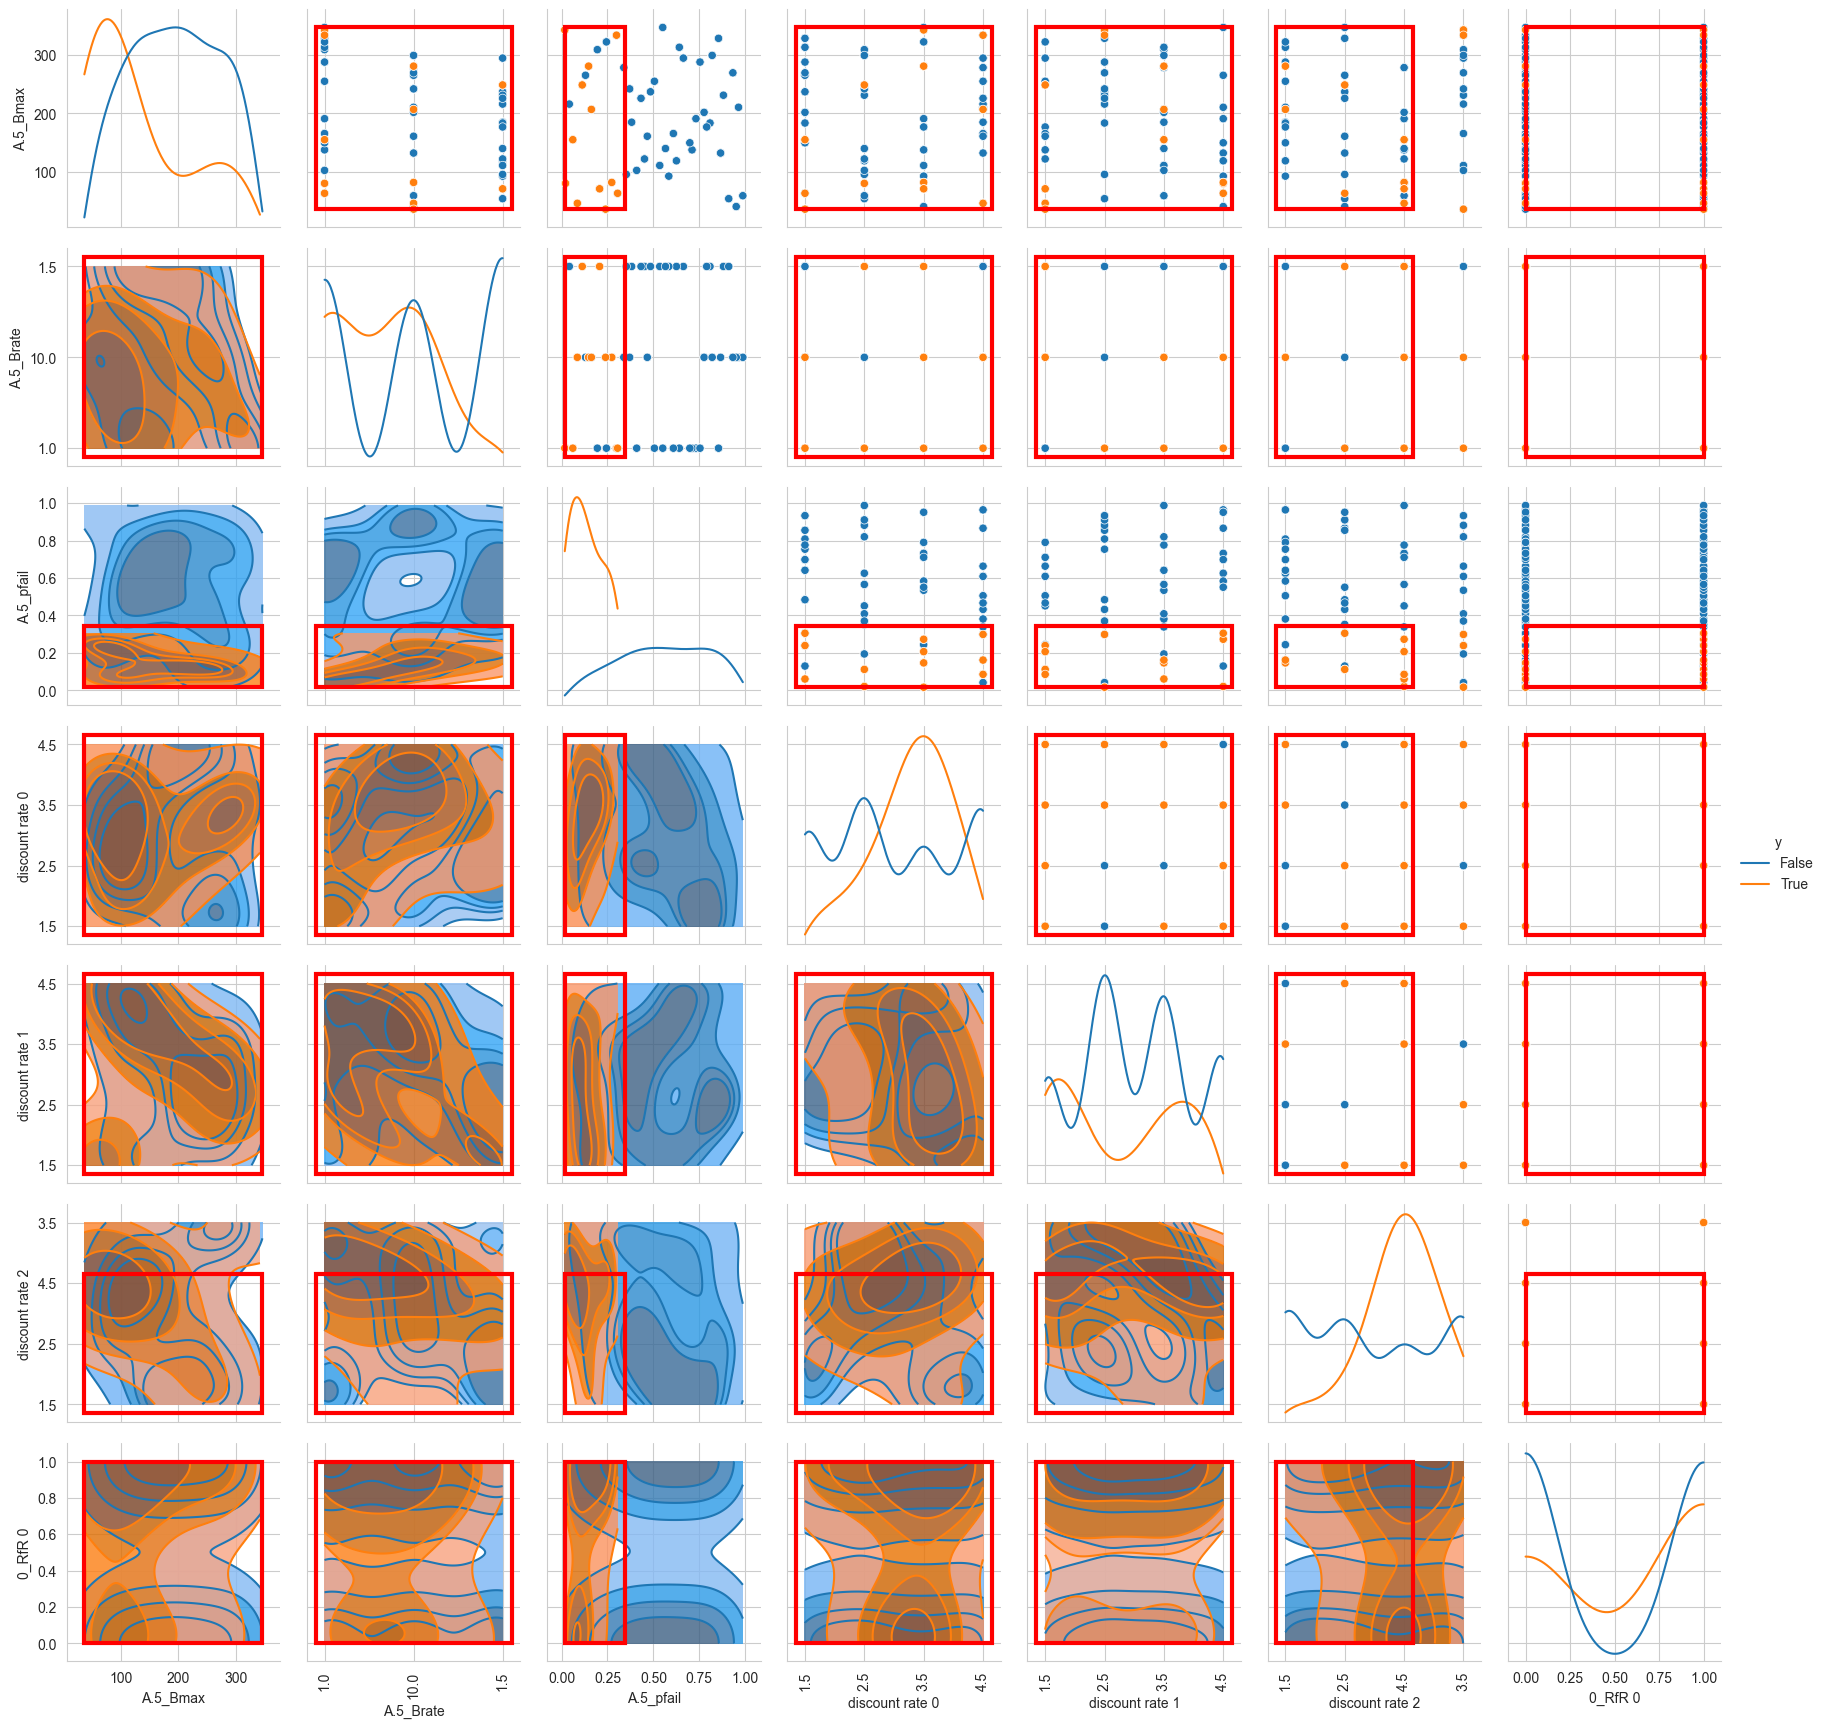

In [35]:
box.show_pairs_scatter(dims=['A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0'])
plt.show()

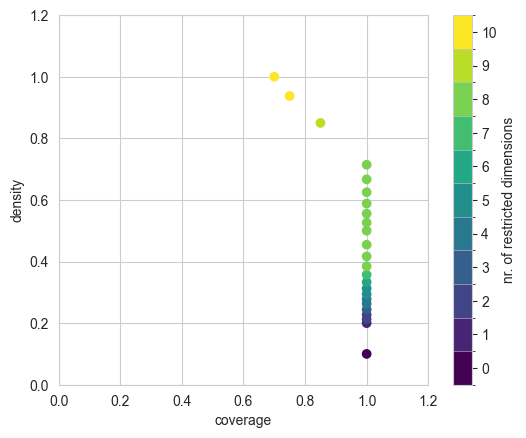

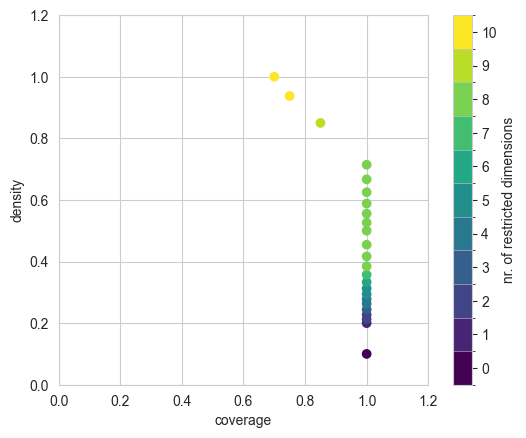

In [36]:
box.show_tradeoff()

[<Figure size 640x480 with 1 Axes>]

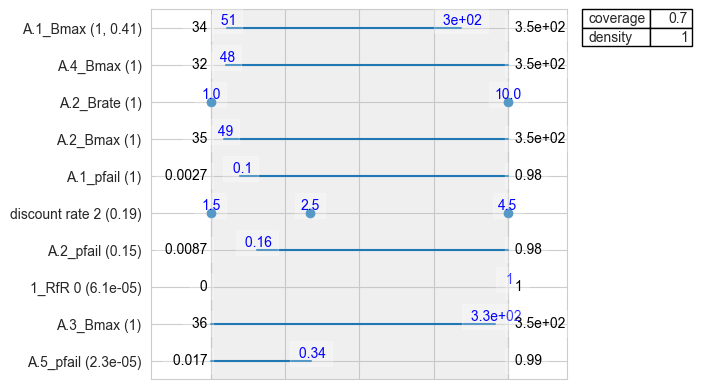

In [37]:
box.inspect(style="graph")